# Entendendo os dados que tratamos

## Importando as bibliotecas

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 6)})
print('Todas as bibliotecas foram importadas com sucesso')

Todas as bibliotecas foram importadas com sucesso


## Preparando o ambiente

In [128]:
PRINCIPAL_PATH = './data/'
SEED = 101
np.random.seed(SEED)

## Lendo a base de dados

In [129]:
covid_india = pd.read_csv(PRINCIPAL_PATH + 'covid_india/new_covid_19_india.csv')
covid_india.head()

,Date,Territory,Cured,Deaths,Confirmed
0,2020-03-29,Kerala,4,1,6
1,2020-04-01,Kerala,4,1,7
2,2020-04-13,Kerala,37,1,2
3,2020-04-25,Kerala,7,1,3
4,2020-05-26,Kerala,11,1,49


## Entendendo o resultado do tratamento dos dados

A tabela de dados que acabamos por obter, demonstra informações sobre registros de covid. A coluna "Date" indica em que dia o registro foi feito, a coluna "Territory" indica o Estado/Território em que o registro ocorreu, e as colunas "Cured, Deaths, Confirmed" são as informações que foram colocadas em cada registro

In [130]:
missing_data_count = covid_india.isna().sum().sum()
print(f'A nossa base de dados apresenta {missing_data_count} dados faltantes')

A nossa base de dados apresenta 0 dados faltantes


In [131]:
n_rows, n_columns = covid_india.shape
print(f'Temos uma tabela que tem {n_rows} colunas e {n_columns} linhas')

Temos uma tabela que tem 9179 colunas e 5 linhas


In [132]:
covid_india.describe()

,Cured,Deaths,Confirmed
count,9179.000000,9179.000000,9179.000000
mean,2374.028652,30.793550,2757.563460
std,5646.764619,74.148092,6243.914535
min,1.000000,1.000000,1.000000
25%,169.000000,3.000000,205.500000
50%,603.000000,8.000000,696.000000
75%,2119.500000,24.000000,2475.500000
max,99651.000000,1409.000000,68631.000000


## Vizualizando os dados graficamente

### Vizualizando a correlação entre os dados

In [133]:
corr = covid_india.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

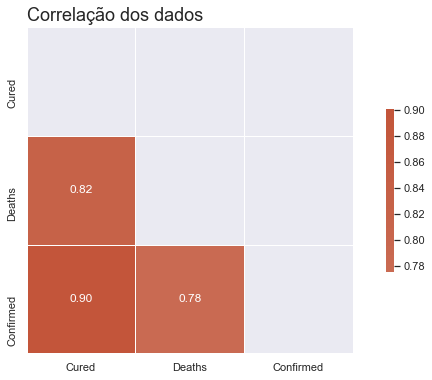

In [134]:
ax = sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot = True, fmt = '.2f')
ax.set_title('Correlação dos dados', fontsize = 18, loc = 'left')
ax = ax

Os nossos dados apresentam correlação alta. Não é nada que nos chame a atenção já que é bem óbvio que com quantos mais casos acontecendo, mais falecimentos teremos, por exemplo.

### Vizualizando a distribuição das variáveis quantitativas

In [135]:
numeric_variables = ['Cured', 'Deaths', 'Confirmed']
numeric_variables

['Cured', 'Deaths', 'Confirmed']

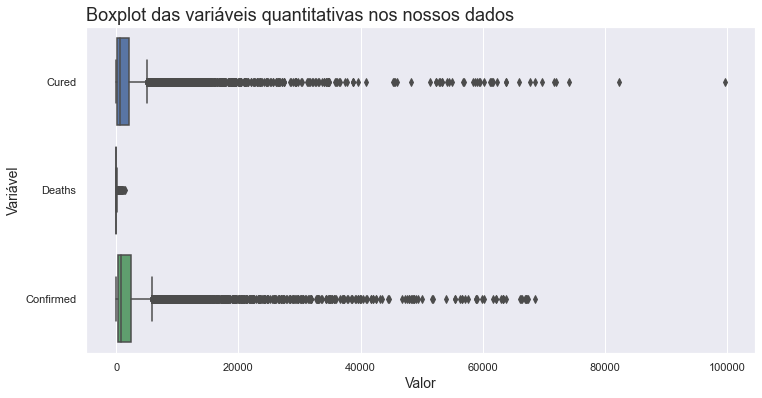

In [136]:
ax = sns.boxplot(x = 'value', y = 'variable', data = covid_india[numeric_variables].melt())
ax.set_title(
    'Boxplot das variáveis quantitativas nos nossos dados',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Variável', fontsize = 14)
ax.set_xlabel('Valor', fontsize = 14)
ax = ax

A vizualização não ficou muito agrádavel por causa da variável "Deaths" que apresenta um valor proporcionalmente menor. Vamos agora vizualizar somente as outras duas colunas "Cured" e "Confirmed"

In [137]:
numeric_variables_without_deaths = ['Cured', 'Confirmed']
numeric_variables_without_deaths

['Cured', 'Confirmed']

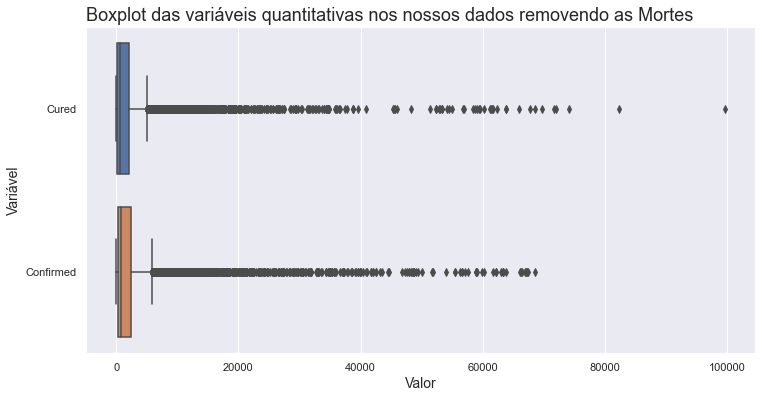

In [138]:
ax = sns.boxplot(
    x = 'value',
    y = 'variable',
    data = covid_india[numeric_variables_without_deaths].melt()
)
ax.set_title(
    'Boxplot das variáveis quantitativas nos nossos dados removendo as Mortes',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Variável', fontsize = 14)
ax.set_xlabel('Valor', fontsize = 14)
ax = ax

Ainda está díficil para interpretarmos, vamos gerar um histograma de todas as variáveis para que possamos vizualizar melhor

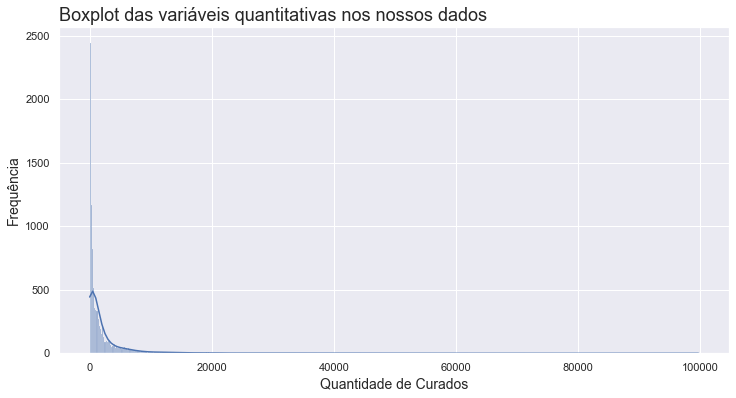

In [139]:
ax = sns.histplot(
    x = 'Cured',
    data = covid_india,
    kde = True
)
ax.set_title(
    'Boxplot das variáveis quantitativas nos nossos dados',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Quantidade de Curados', fontsize = 14)
ax = ax

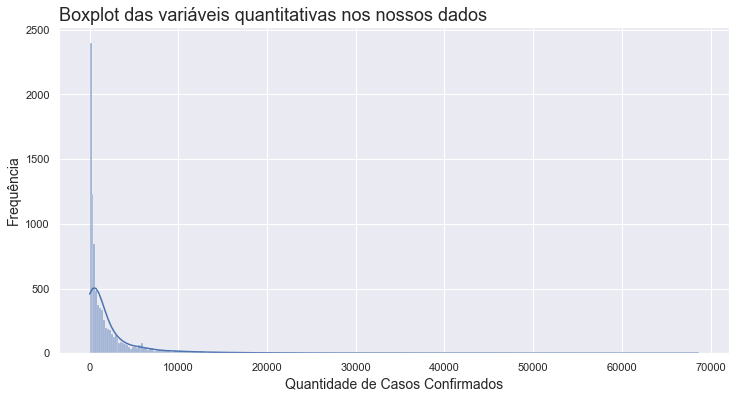

In [140]:
ax = sns.histplot(
    x = 'Confirmed',
    data = covid_india,
    kde = True
)
ax.set_title(
    'Boxplot das variáveis quantitativas nos nossos dados',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Quantidade de Casos Confirmados', fontsize = 14)
ax = ax

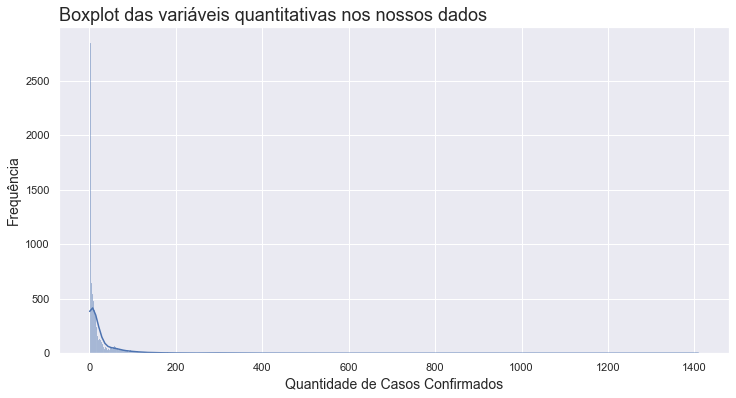

In [141]:
ax = sns.histplot(
    x = 'Deaths',
    data = covid_india,
    kde = True
)
ax.set_title(
    'Boxplot das variáveis quantitativas nos nossos dados',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Quantidade de Casos Confirmados', fontsize = 14)
ax = ax

Percebemos com os gráficos acima que existem muitos registros com valores baixos e poucos registros com valores altos. Parece que estamos diante de distribuições exponenciais.

Vamos agora tentar vizualizar a distribuição da soma de todos os registros no dia

In [142]:
days = covid_india.groupby('Date').sum()
days.head()

,Cured,Deaths,Confirmed
Date,,,
2020-03-14,1,1,1
2020-03-25,1,1,39
2020-03-27,14,1,6
2020-03-28,10,1,50
2020-03-29,7,4,40


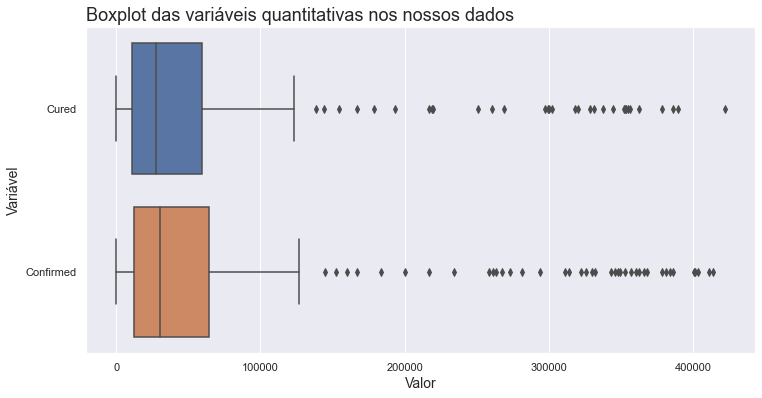

In [143]:
ax = sns.boxplot(
    x = 'value',
    y = 'variable',
    data = days[numeric_variables_without_deaths].melt()
)
ax.set_title(
    'Boxplot das variáveis quantitativas nos nossos dados',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Variável', fontsize = 14)
ax.set_xlabel('Valor', fontsize = 14)
ax = ax

Agora sim o gráfico nos mostra bem mais visível essa distribuição

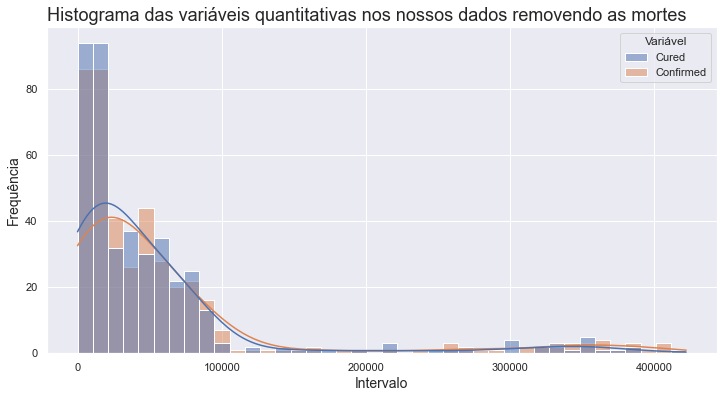

In [144]:
ax = sns.histplot(
    x = 'value',
    hue = 'Variável',
    data = days[numeric_variables_without_deaths].melt().rename(
        columns = {'variable': 'Variável'}
    ),
    kde = True
)
ax.set_title(
    'Histograma das variáveis quantitativas nos nossos dados removendo as mortes',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Intervalo', fontsize = 14)
ax = ax

Podemos ver no gráfico acima que a variável "Cured" varia de forma muito parecida com a "Confirmed"

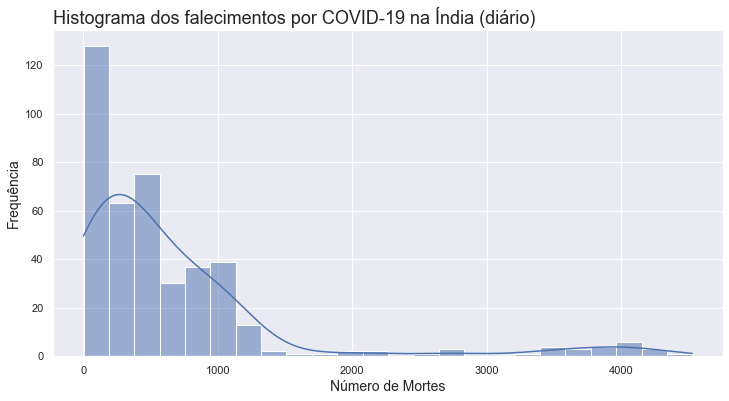

In [145]:
ax = sns.histplot(
    x = 'Deaths',
    data = days,
    kde = True
)
ax.set_title(
    'Histograma dos falecimentos por COVID-19 na Índia (diário)',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Número de Mortes', fontsize = 14)
ax = ax

Os dias continuam nos mostrando uma curva que desce rapidamente quando o número de valor do eixo X vai aumentando

Vamos agora tentar fazer um histograma acumulativo

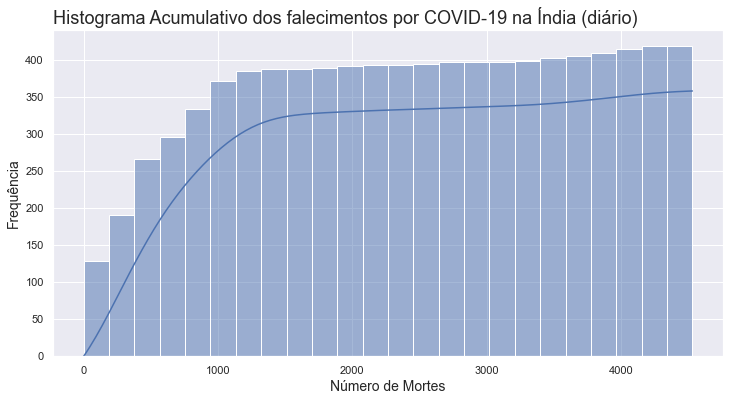

In [146]:
ax = sns.histplot(
    x = 'Deaths',
    data = days,
    kde = True,
    cumulative = True
)
ax.set_title(
    'Histograma Acumulativo dos falecimentos por COVID-19 na Índia (diário)',
    fontsize = 18,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Número de Mortes', fontsize = 14)
ax = ax

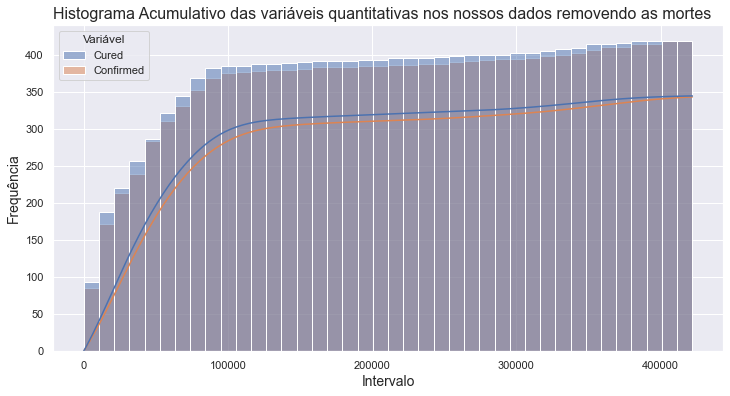

In [147]:
ax = sns.histplot(
    x = 'value',
    hue = 'Variável',
    data = days[numeric_variables_without_deaths].melt().rename(
        columns = {'variable': 'Variável'}
    ),
    kde = True,
    cumulative = True
)
ax.set_title(
    'Histograma Acumulativo das variáveis quantitativas nos nossos dados removendo as mortes',
    fontsize = 16,
    loc = 'left'
)
ax.set_ylabel('Frequência', fontsize = 14)
ax.set_xlabel('Intervalo', fontsize = 14)
ax = ax

## Salvando os dados por dia

In [148]:
territories_by_day = covid_india.groupby(['Territory', 'Date']).sum()
territories_by_day.head()

Cured  Deaths  Confirmed
Territory                   Date                                
Andaman and Nicobar Islands 2020-07-28     10       1         14
                            2020-07-30      5       1         65
                            2020-08-01     13       1         77
                            2020-08-02     12       2         88
                            2020-08-03     16       1         98

In [149]:
days = {
    'Territory': [], 'Date': [], 'Cured': [], 'Deaths': [], 'Confirmed': []
}

for territory in covid_india['Territory'].drop_duplicates():
    territory_sum = territories_by_day.loc[territory]
    territory_sum['Territory'] = territory
    territory_sum.reset_index(inplace = True)
    for column in territory_sum.columns:
        days[column] += list(territory_sum[column].values)

days = pd.DataFrame(days)
days.head()

,Territory,Date,Cured,Deaths,Confirmed
0,Kerala,2020-03-29,4,1,6
1,Kerala,2020-04-01,4,1,7
2,Kerala,2020-04-13,37,1,2
3,Kerala,2020-04-25,7,1,3
4,Kerala,2020-05-26,11,1,49


In [150]:
days = days[['Date', 'Territory', 'Cured', 'Deaths', 'Confirmed']]
days.head()

,Date,Territory,Cured,Deaths,Confirmed
0,2020-03-29,Kerala,4,1,6
1,2020-04-01,Kerala,4,1,7
2,2020-04-13,Kerala,37,1,2
3,2020-04-25,Kerala,7,1,3
4,2020-05-26,Kerala,11,1,49


In [151]:
days.dtypes

Date         object
Territory    object
Cured         int64
Deaths        int64
Confirmed     int64
dtype: object

In [152]:
days['Date'] = pd.to_datetime(days['Date'])
days.dtypes

Date         datetime64[ns]
Territory            object
Cured                 int64
Deaths                int64
Confirmed             int64
dtype: object

In [153]:
days.sort_values('Date', inplace = True)
days.reset_index(drop = True, inplace = True)
days.head()

,Date,Territory,Cured,Deaths,Confirmed
0,2020-03-14,Delhi,1,1,1
1,2020-03-25,Maharashtra,1,1,39
2,2020-03-27,Maharashtra,14,1,6
3,2020-03-28,Maharashtra,10,1,50
4,2020-03-29,Kerala,4,1,6


In [154]:
days.to_csv(PRINCIPAL_PATH + 'covid_india/covid_india_by_days.csv', index = False)
print('Salvo com sucesso!')

Salvo com sucesso!
